
sr_noise_data_den_num['Ratio_Descriptor_Monthly'] = \
                     sr_noise_data_den_num['Month_Count_Descriptor'] / sr_noise_data_den_num['Month_Count_All'] 

import plotly.express as px
df = sr_noise_data_den_num 
fig = px.line(df, x="Year_month_created", y="Ratio_Descriptor_Monthly", color="Noise Descriptor")
fig.show()

df = sr_noise_data_den_num 
fig = px.line(df, x="Year_month_created", y="Ratio_Descriptor_Monthly", color="Noise Descriptor",range_y=[0,.3])
fig.show()

# comparing by Noise compliant type

# Group by Noise Complaint Type numerator 
numerator = sr_noise_data_den.groupby(['Noise Complaint Type',\
                                       'Year_month_created','Month_Count_All'])['Unique Key'].agg('count')

#merge again
sr_noise_data_den_num = pd.merge(sr_noise_data_den,\
                                 numerator,\
                                 how='left',\
                                 on=['Noise Complaint Type','Year_month_created','Month_Count_All'])

#rename 
sr_noise_data_den_num.rename(columns={'Unique Key_x': 'Unique Key',\
                                      'Unique Key_y': 'Month_Count_Complaint_Type'},\
                             inplace=True)

sr_noise_data_den_num['Ratio_Complaint_Type_Monthly'] = \
                     sr_noise_data_den_num['Month_Count_Complaint_Type'] / sr_noise_data_den_num['Month_Count_All'] 

df = sr_noise_data_den_num 
fig = px.line(df, x="Year_month_created", y="Ratio_Complaint_Type_Monthly", color="Noise Complaint Type")
fig.show()

df = sr_noise_data_den_num[sr_noise_data_den_num['Noise Complaint Type']=='Park']
fig = px.line(df, x="Year_month_created", y='Month_Count_Complaint_Type')
fig.show()

df = sr_noise_data_den_num[sr_noise_data_den_num['Noise Complaint Type']=='Residential']
fig = px.line(df, x="Year_month_created", y='Month_Count_Complaint_Type')
fig.show()

df = sr_noise_data_den_num[sr_noise_data_den_num['Noise Complaint Type']=='Club/Bar/Restaurant']
fig = px.line(df, x="Year_month_created", y='Month_Count_Complaint_Type')
fig.show()

In [ ]:
#sns.lineplot(data=flights, x="year", y="passengers", hue="month")


## Load in cleaned Noise complaints data csv 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
#plt.style.use('ggplot')
import plotly.express as px
import plotly.graph_objects as go


In [2]:
## Load in full dataset with selected columns 
filepath = '/Users/nikiagrawal/Desktop/EDA/Service-Requests/'
filename = '311_Service_Requests_Noise_Cleaned.csv'
sr_noise_data = pd.read_csv(filepath + filename)

In [3]:
#sr_noise_data.info()
#sr_noise_data.columns

# Visual 2: Number of Noise-Related Complaints Created Every Month


In [5]:
# fig = px.line(sr_noise_data,
#               x="Year_month_created",
#               y="Month_Count_All", 
#               title='Total Number of Noise-Related Complaints Created Every Month',
#               labels={
#                      "Year_month_created": "Month Year Created",
#                      "Month_Count_All": "Total Number of Complaints",
#                  })
#fig.show()

In [ ]:
#sr_noise_data.shape

In [15]:
df = sr_noise_data[["Year_month_created","Month_Count_All"]].drop_duplicates()
df["Percent of Total Complaints"] = round((df["Month_Count_All"]/(1664108))*100,2)
#df

## Visual 3 & 4: Percent of Complaints Created Every Month by Type / Descriptor


In [19]:
sr_noise_data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Incident Zip',
       'Incident Address', 'Street Name', 'Resolution Description', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Open Data Channel Type', 'Latitude', 'Longitude', 'Location',
       'Noise Descriptor', 'Noise Complaint Type', 'Time Elapsed',
       'Date_created', 'Year_month_created', 'Year_created', 'Month_created',
       'Day_created', 'Hour_created', 'Month_Count_All',
       'Month_Count_Descriptor', 'Month_Count_Complaint_Type'],
      dtype='object')

In [29]:
sr_noise_data['Ratio_Complaint_Type_Monthly'] = \
                     round(sr_noise_data['Month_Count_Complaint_Type'] / sr_noise_data['Month_Count_All']*100,2) 

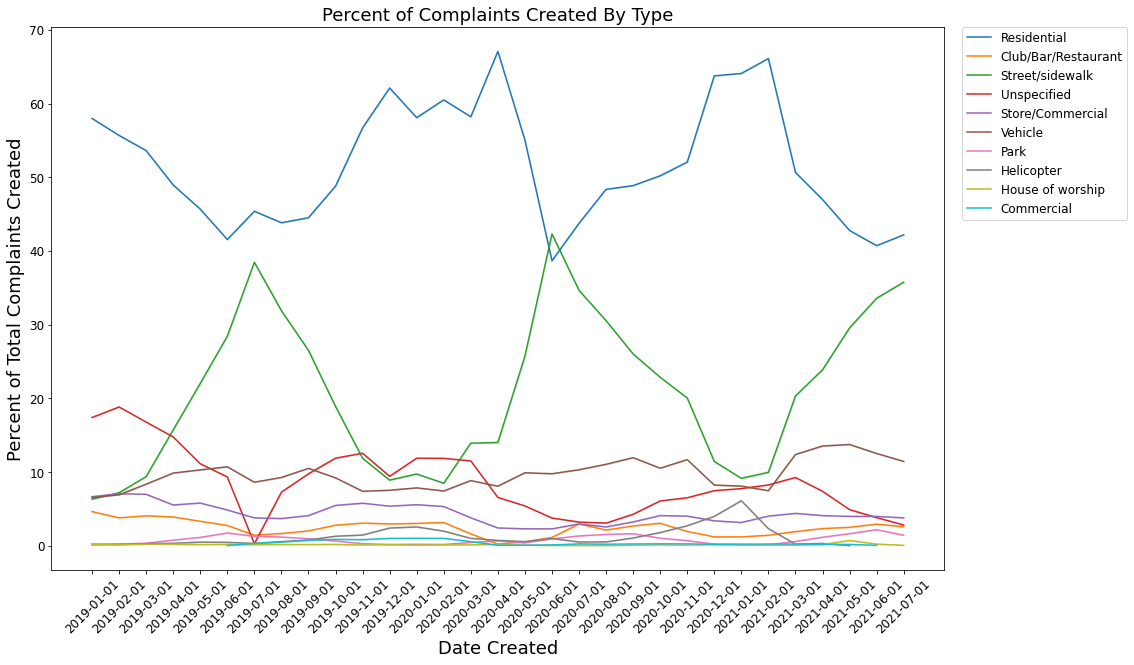

<Figure size 432x288 with 0 Axes>

In [56]:
df = sr_noise_data[['Year_month_created','Noise Complaint Type','Ratio_Complaint_Type_Monthly']]

plt.figure(figsize=(16, 10))
sns.lineplot(data = df, 
             x='Year_month_created', 
             y='Ratio_Complaint_Type_Monthly', 
             hue='Noise Complaint Type', 
             palette ="tab10")

plt.xlabel("Date Created",fontsize=18)
plt.xticks(rotation=45)
plt.ylabel("Percent of Total Complaints Created",fontsize=18)
plt.title("Percent of Complaints Created By Type",fontsize=18)
plt.rcParams.update({'font.size': 12})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
plt.savefig('Percent_by_type.png', format='png', dpi=1200, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures



In [58]:
df = sr_noise_data[(sr_noise_data['Noise Complaint Type']=='Park')
                   | (sr_noise_data['Noise Complaint Type']=='Residential')
                   | (sr_noise_data['Noise Complaint Type']=='Club/Bar/Restaurant')]

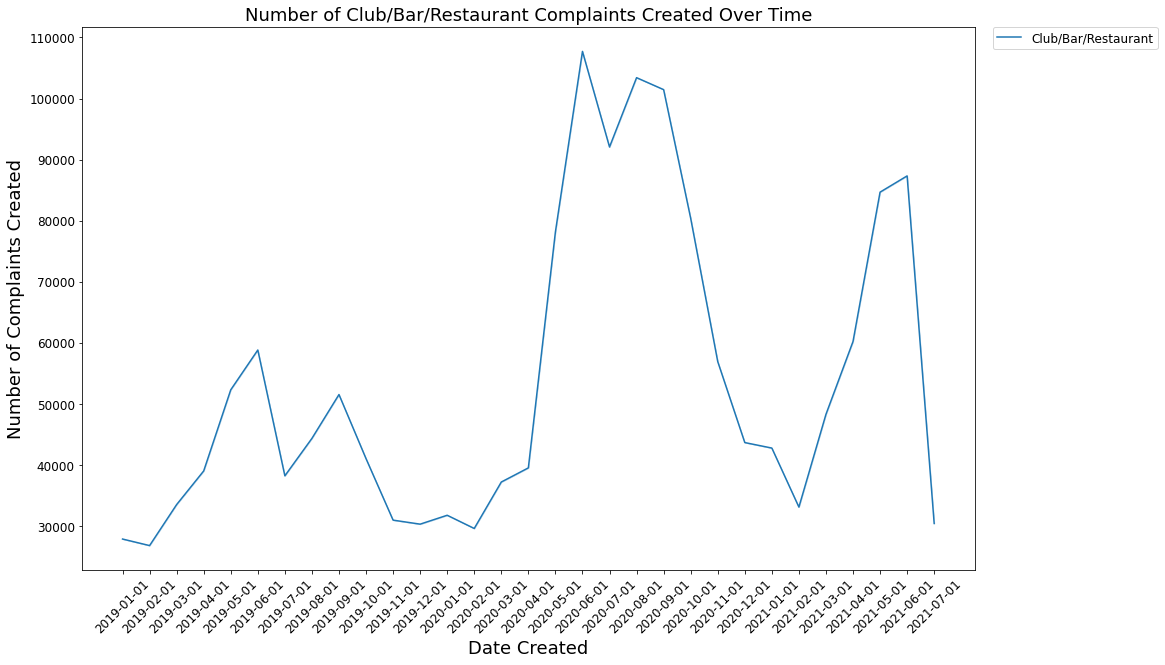

In [65]:
# Look at Park counts 
df = sr_noise_data[(sr_noise_data['Noise Complaint Type']=="Club/Bar/Restaurant")]
#                    | (sr_noise_data['Noise Complaint Type']=='Park')
#                    | (sr_noise_data['Noise Complaint Type']=='Club/Bar/Restaurant')]


# fig = px.line(df, x="Year_month_created", y='Month_Count_Complaint_Type')
plt.figure(figsize=(16, 10))
sns.lineplot(data = df, 
             x='Year_month_created', 
             y='Month_Count_All', 
             hue='Noise Complaint Type',
             palette ="tab10")

plt.xlabel("Date Created",fontsize=18)
plt.xticks(rotation=45)
plt.ylabel("Number of Complaints Created",fontsize=18)
plt.title("Number of Club/Bar/Restaurant Complaints Created Over Time",fontsize=18)
plt.rcParams.update({'font.size': 12})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
#plt.savefig('Percent_by_type.png', format='png', dpi=1200, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures



In [50]:
sr_noise_data['Ratio_Descriptor_Monthly'] = \
                     round(sr_noise_data['Month_Count_Descriptor'] / sr_noise_data['Month_Count_All']*100,2) 

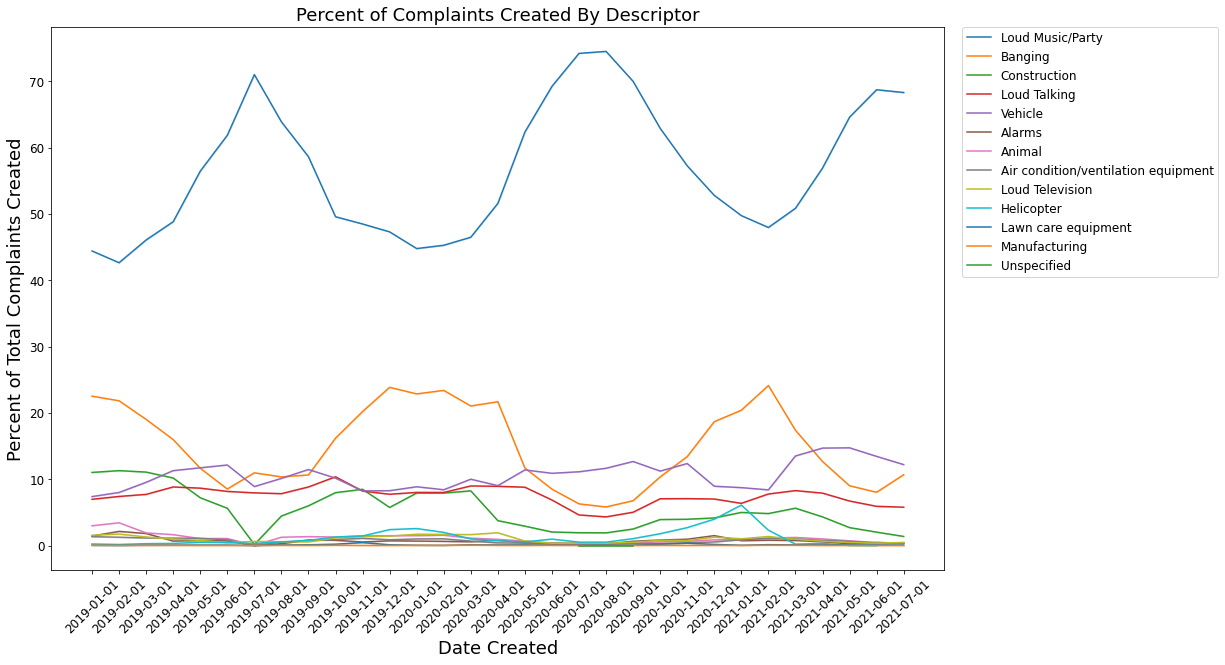

<Figure size 432x288 with 0 Axes>

In [57]:
df = sr_noise_data[['Year_month_created','Noise Descriptor','Ratio_Descriptor_Monthly']]

plt.figure(figsize=(16, 10))
sns.lineplot(data = df, 
             x='Year_month_created', 
             y='Ratio_Descriptor_Monthly', 
             hue='Noise Descriptor', 
             palette ="tab10")

plt.xlabel("Date Created",fontsize=18)
plt.xticks(rotation=45)
plt.ylabel("Percent of Total Complaints Created",fontsize=18)
plt.title("Percent of Complaints Created By Descriptor",fontsize=18)
plt.rcParams.update({'font.size': 12})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
plt.savefig('Percent_by_descriptor.png', format='png', dpi=1200, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures



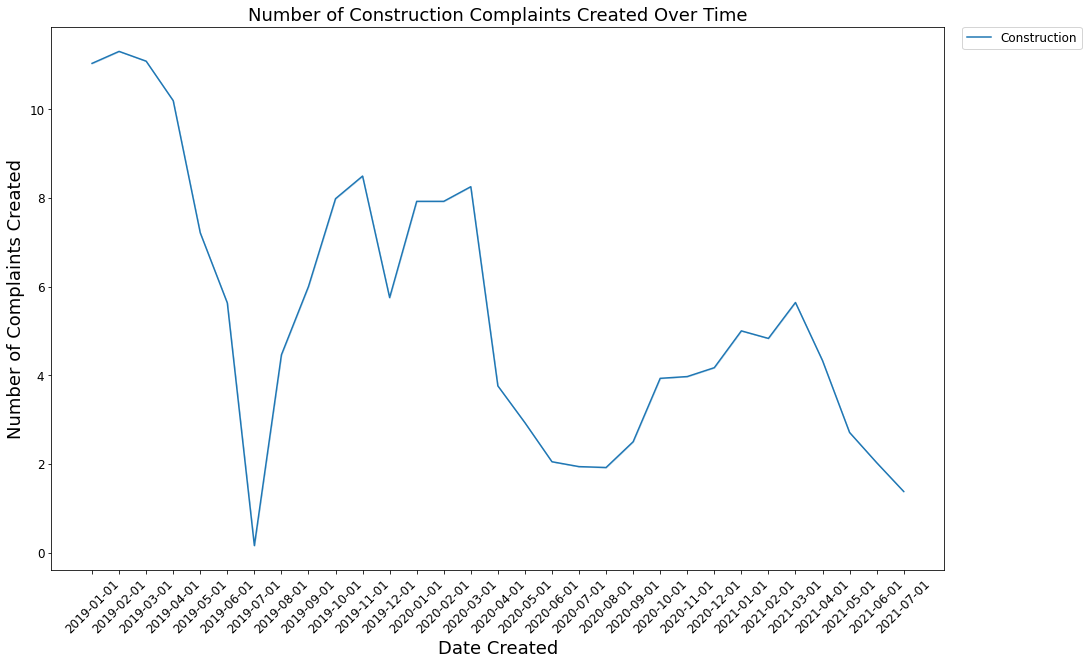

<Figure size 432x288 with 0 Axes>

In [67]:
df = sr_noise_data[['Year_month_created','Noise Descriptor','Ratio_Descriptor_Monthly']]
df = sr_noise_data[(sr_noise_data['Noise Descriptor']=="Construction")]

plt.figure(figsize=(16, 10))
sns.lineplot(data = df, 
             x='Year_month_created', 
             y='Ratio_Descriptor_Monthly', 
             hue='Noise Descriptor', 
             palette ="tab10")

plt.xlabel("Date Created",fontsize=18)
plt.xticks(rotation=45)
plt.ylabel("Number of Complaints Created",fontsize=18)
plt.title("Number of Construction Complaints Created Over Time",fontsize=18)
plt.rcParams.update({'font.size': 12})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
plt.savefig('Percent_by_descriptor.png', format='png', dpi=1200, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


In [ ]:
df = sr_noise_data[['Year_month_created','Noise Descriptor','Ratio_Descriptor_Monthly']]
df = sr_noise_data[(sr_noise_data['Noise Descriptor']=="Loud Talking")]

plt.figure(figsize=(16, 10))
sns.lineplot(data = df, 
             x='Year_month_created', 
             y='Ratio_Descriptor_Monthly', 
             hue='Noise Descriptor', 
             palette ="tab10")

plt.xlabel("Date Created",fontsize=18)
plt.xticks(rotation=45)
plt.ylabel("Number of Complaints Created",fontsize=18)
plt.title("Number of Construction Complaints Created Over Time",fontsize=18)
plt.rcParams.update({'font.size': 12})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
plt.savefig('Percent_by_descriptor.png', format='png', dpi=1200, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
